In [18]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
df=pd.read_csv("C:\\Users\\91821\\OneDrive\\Desktop\\notebook\\notebook.csv")
df.head()



,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


Text(0, 0.5, 'iq')

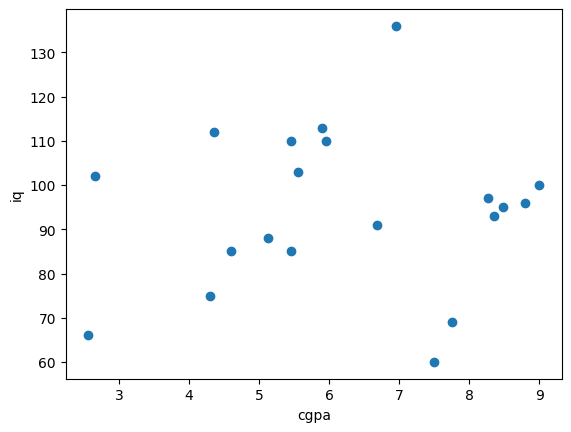

In [19]:
plt.scatter(df['cgpa'],df['iq'])
plt.xlabel('cgpa')
plt.ylabel('iq')


In [20]:
# n_cluster=3  means we need only 3 cluster
km=KMeans(n_clusters=3)
# train the km model and predict (in which cluster it is belomgimg to)
predicted=km.fit_predict(df[['cgpa','iq']])
predicted

c:\python3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 1, 1, 1, 1])

Text(0, 0.5, 'iq')

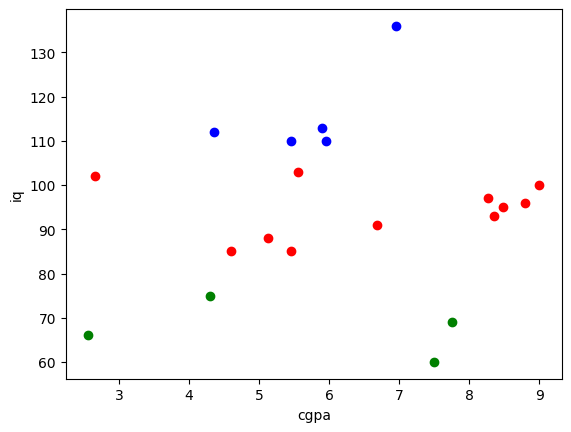

In [21]:
df['cluster']=predicted
df.head()
df1=df[df.cluster==0]

df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.cgpa,df1['iq'],color='green')
plt.scatter(df2.cgpa,df2['iq'],color='red')
plt.scatter(df3.cgpa,df3['iq'],color='blue')
plt.xlabel('cgpa')
plt.ylabel('iq')

# here the output are undesirable because our data is not preprocessed  but directly given to clustering 

In [22]:
#processing the data
scale=MinMaxScaler()
scale.fit(df[['cgpa']])
df['cgpa']=scale.transform(df[['cgpa']])

scale.fit(df[['iq']])
df['iq']=scale.transform(df[['iq']])

km=KMeans(n_clusters=3)
predicted=km.fit_predict(df[['cgpa']])

km=KMeans(n_clusters=3)
# train the km model and predict (in which cluster it is belomgimg to)
predicted=km.fit_predict(df[['cgpa','iq']])
predicted

c:\python3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\python3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1])

Text(0, 0.5, 'iq')

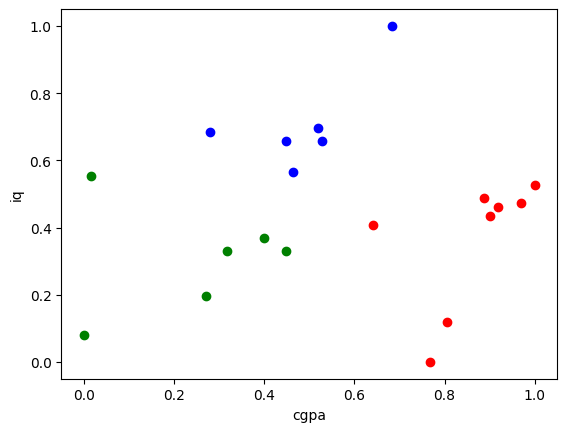

In [23]:

# deleting previously addes cluster and creating new
df=df.drop(['cluster'],axis='columns')
df['cluster']=predicted
df.head()
df1=df[df.cluster==0]

df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.cgpa,df1['iq'],color='green')
plt.scatter(df2.cgpa,df2['iq'],color='red')
plt.scatter(df3.cgpa,df3['iq'],color='blue')
plt.xlabel('cgpa')
plt.ylabel('iq')

In [24]:

#finding centroid of clusters

km.cluster_centers_

array([[0.24171843, 0.30921053],
       [0.86121894, 0.36348684],
       [0.48706004, 0.71052632]])

Text(0, 0.5, 'iq')

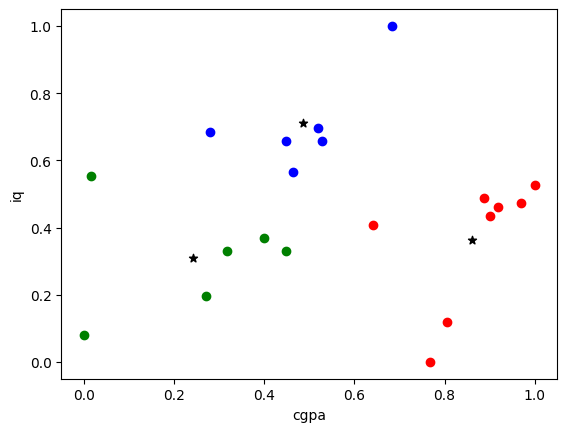

In [25]:

#plotting centroids of clusters

plt.scatter(df1.cgpa,df1['iq'],color='green')
plt.scatter(df2.cgpa,df2['iq'],color='red')
plt.scatter(df3.cgpa,df3['iq'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*')
plt.xlabel('cgpa')
plt.ylabel('iq')